In [1]:
import platform
import os

import matplotlib.pyplot as plt
import pandas as pd

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dn277127':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 7  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_inter'

# file_nums = list(range(0, 6))
file_nums = 'all'

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 237/237 [00:23<00:00, 10.13it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, 10, file_nums, chunk_size, save_waveforms=False)
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 600, 'resist_1': 410}
Reading in data...


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


Read in data shape: (217827, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:03<00:00,  4.64it/s]


Fitting time: 3.5164289474487305 s
Processed sub-chunk 1/1
Processed chunk 1/3


100%|██████████| 100/100 [00:21<00:00,  4.63it/s]


Read in data shape: (219790, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:03<00:00,  4.65it/s]


Fitting time: 3.979433059692383 s
Processed sub-chunk 1/1
Processed chunk 2/3


100%|██████████| 37/37 [00:07<00:00,  4.63it/s]


Read in data shape: (81718, 256, 32)
Getting amplitudes...


100%|██████████| 15/15 [00:01<00:00, 13.26it/s]


Fitting time: 1.8232090473175049 s
Processed sub-chunk 1/1
Processed chunk 3/3
Getting hits...
Hits shape: (519335, 256)


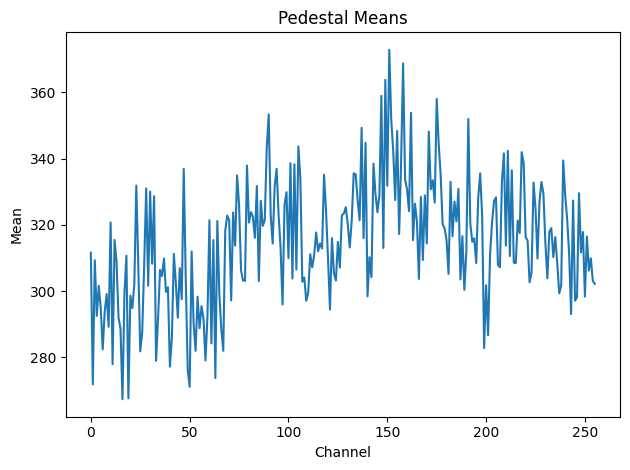

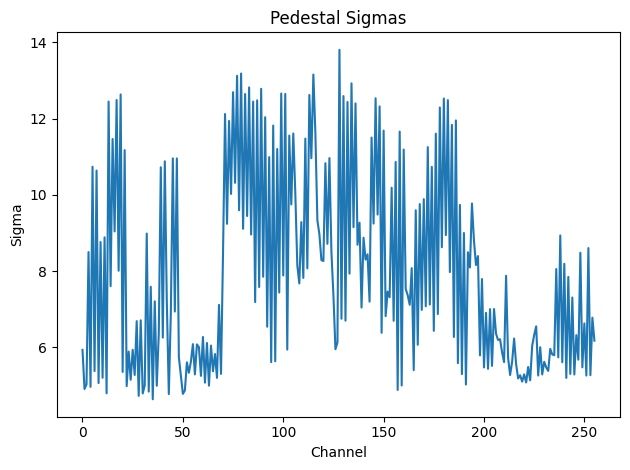

In [6]:
det.dream_data.plot_pedestals()

/home/dylan/PycharmProjects/saclay_micromegas/Detector_Classes/DreamData.py:699: RuntimeWarning: invalid value encountered in divide
  max_amp_div_sum = event_max_amps / event_amp_sums


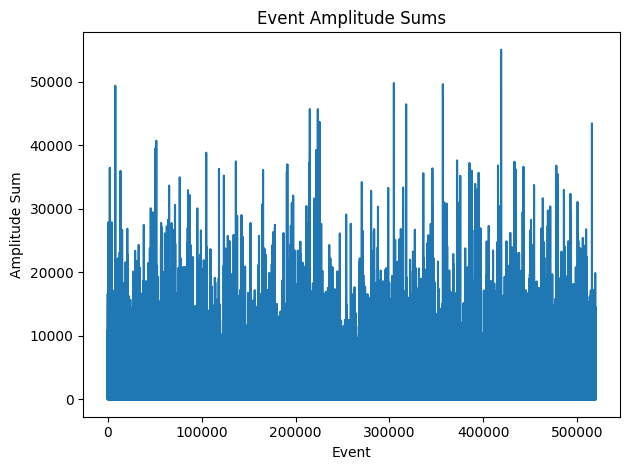

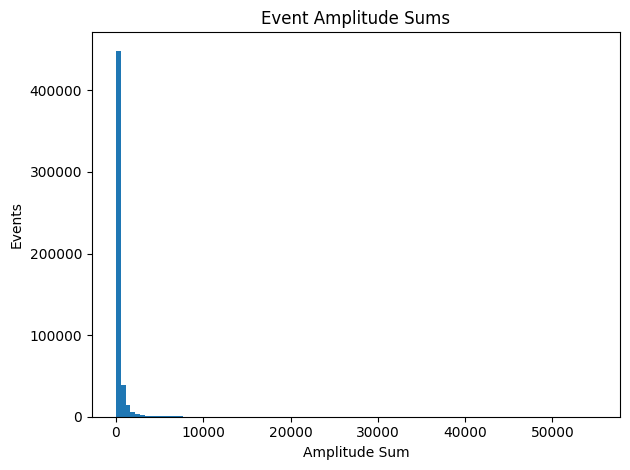

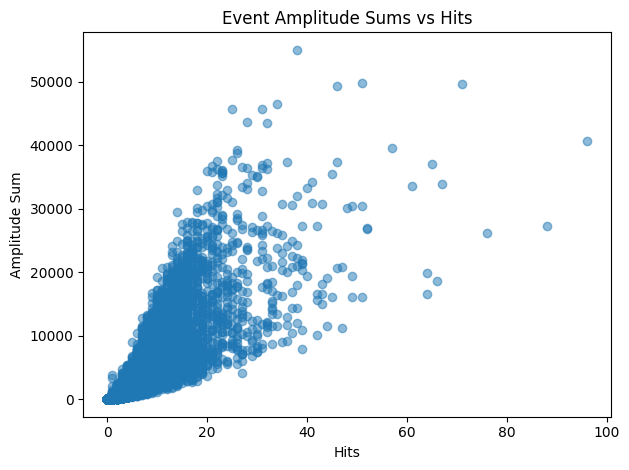

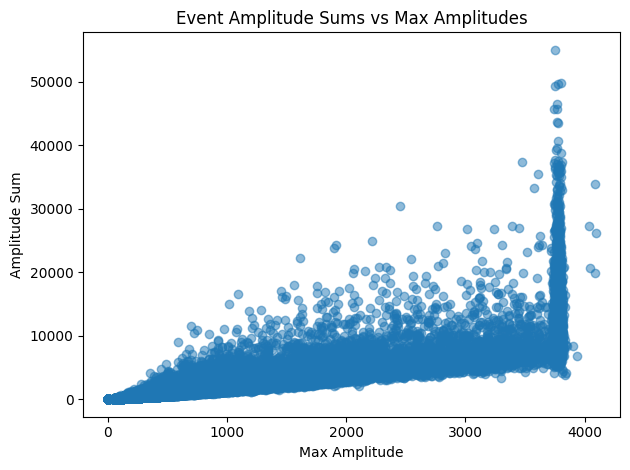

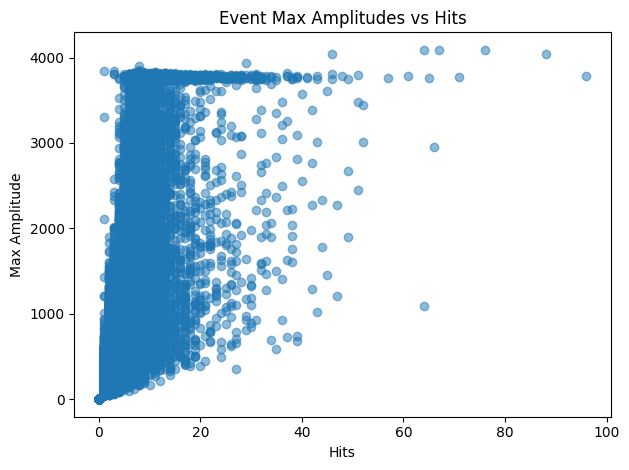

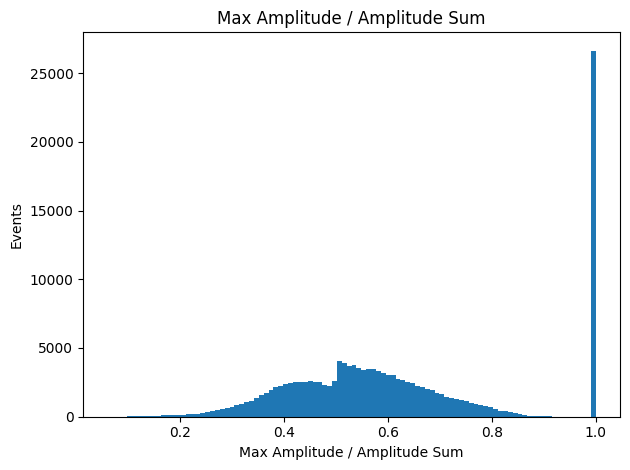

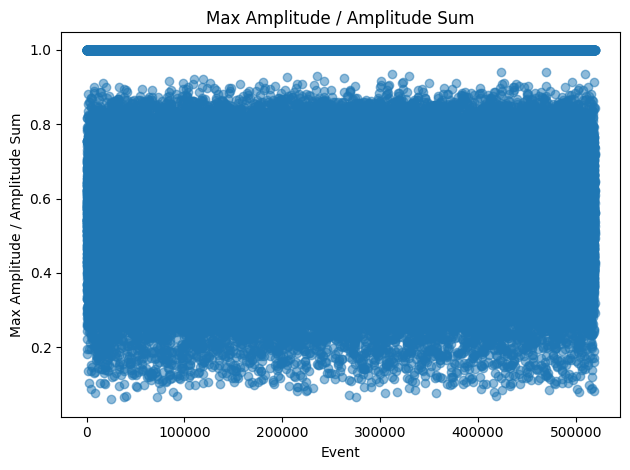

In [7]:
det.dream_data.plot_noise_metric()

Connector 1 Dead Strips: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Connector 2 Dead Strips: [114 116 117 118 119 120 121 122 123 124 125 126 127]
Connector 3 Dead Strips: [128 129 130 131 132 133 134 135 136 137]
Connector 4 Dead Strips: [215 225 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255]


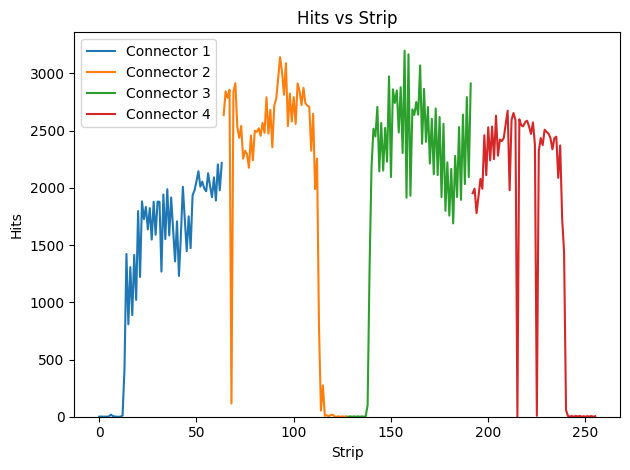

In [8]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

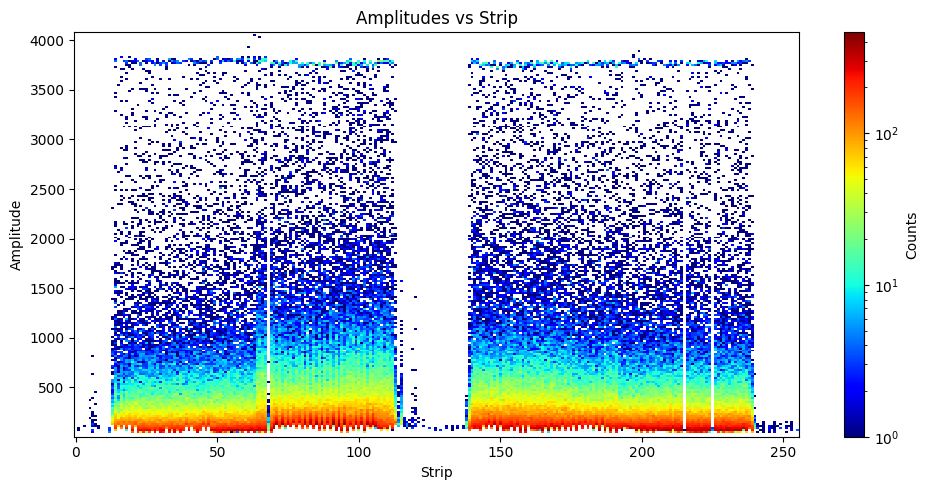

In [9]:
det.dream_data.plot_amplitudes_vs_strip()

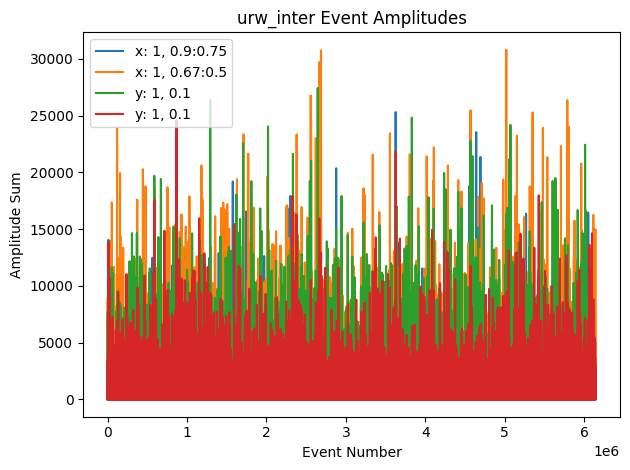

In [10]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

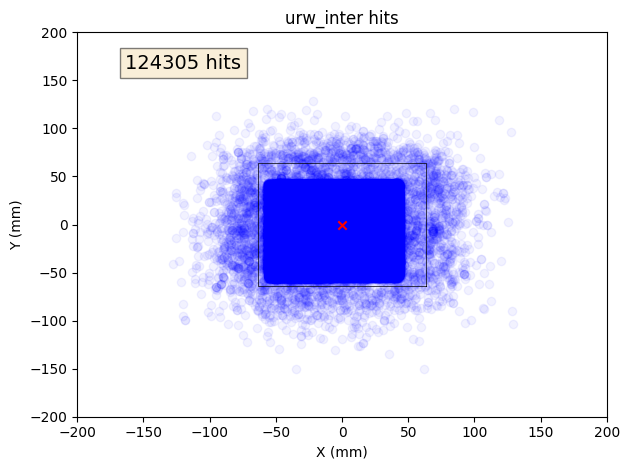

In [11]:
plot_ray_hits_2d(det, ray_data)

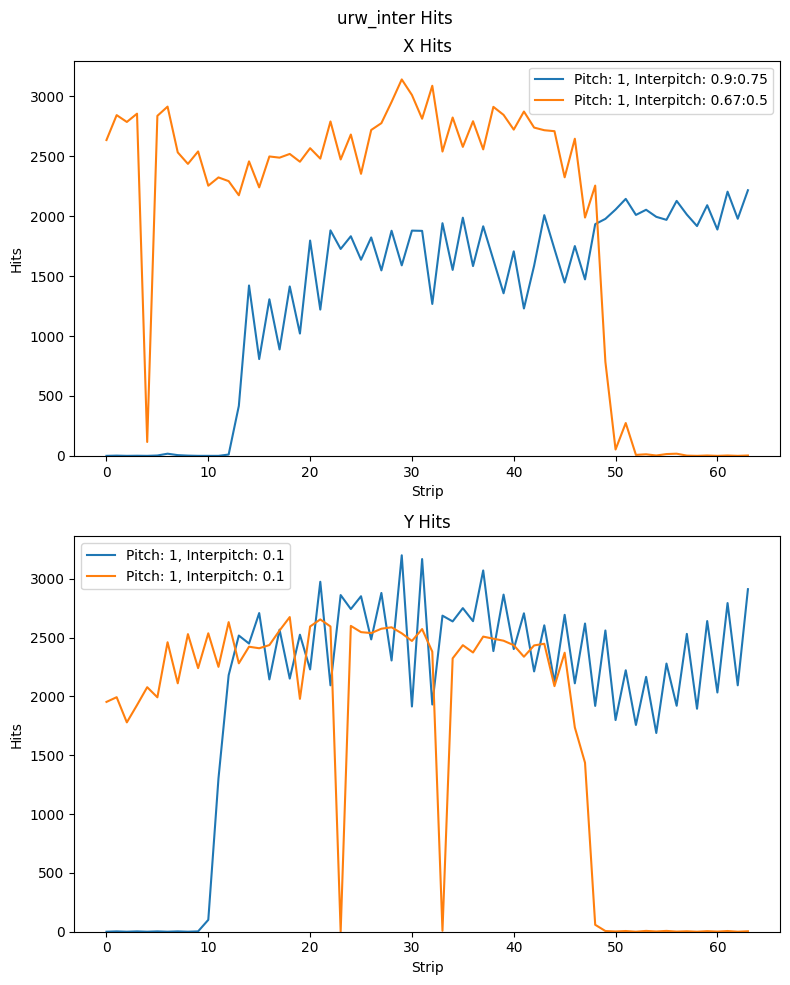

In [12]:
det.plot_hits_1d()

In [13]:
print(len(det.dream_data.hits))

519335


In [14]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

z: 697.0
z: 697.3448275862069
z: 697.6896551724138
z: 698.0344827586207
z: 698.3793103448276
z: 698.7241379310345
z: 699.0689655172414
z: 699.4137931034483
z: 699.7586206896551
z: 700.1034482758621
z: 700.448275862069
z: 700.7931034482758
z: 701.1379310344828
z: 701.4827586206897
z: 701.8275862068965
z: 702.1724137931035
z: 702.5172413793103
z: 702.8620689655172
z: 703.2068965517242
z: 703.551724137931
z: 703.8965517241379
z: 704.2413793103449
z: 704.5862068965517
z: 704.9310344827586
z: 705.2758620689655
z: 705.6206896551724
z: 705.9655172413793
z: 706.3103448275862
z: 706.6551724137931
z: 707.0
z_rot: -1.0
z_rot: -0.9310344827586207
z_rot: -0.8620689655172413
z_rot: -0.7931034482758621
z_rot: -0.7241379310344828
z_rot: -0.6551724137931034
z_rot: -0.5862068965517242
z_rot: -0.5172413793103449
z_rot: -0.4482758620689655
z_rot: -0.3793103448275862
z_rot: -0.31034482758620685
z_rot: -0.24137931034482762
z_rot: -0.1724137931034483
z_rot: -0.10344827586206895
z_rot: -0.034482758620689724
z

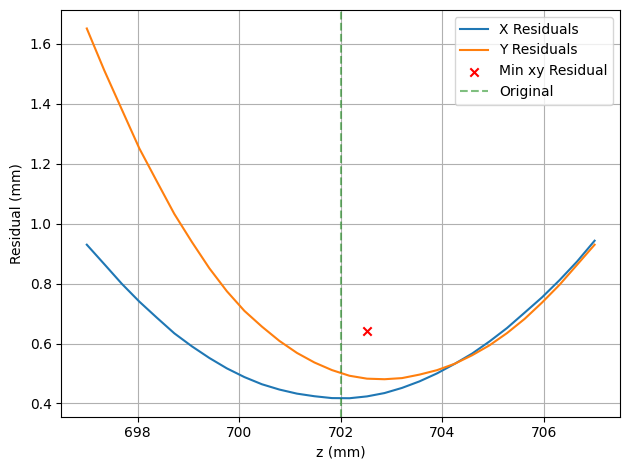

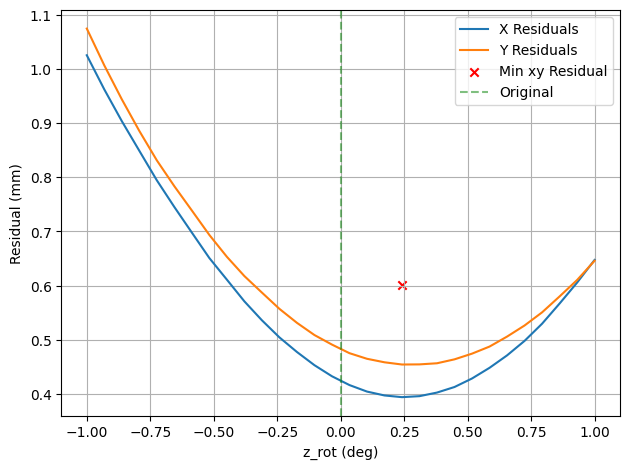

In [15]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

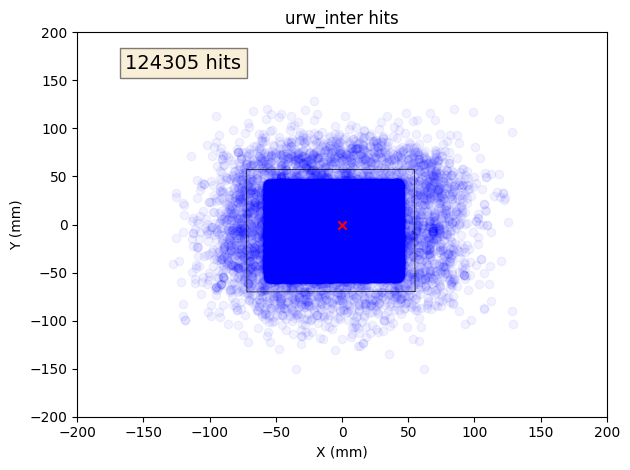

In [16]:
plot_ray_hits_2d(det, ray_data)

Pre-filtered rays: 1630227
All rays: 377596


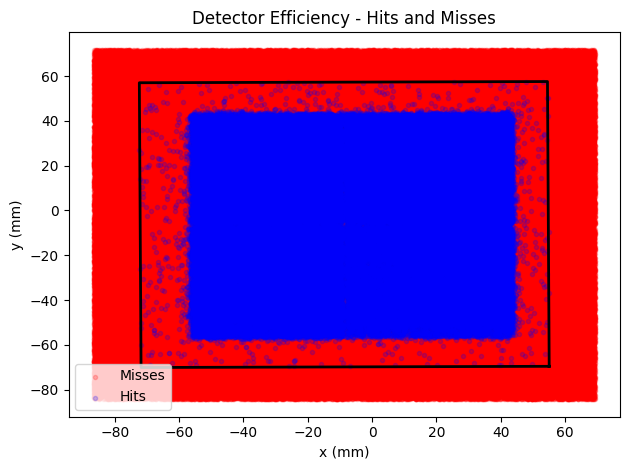

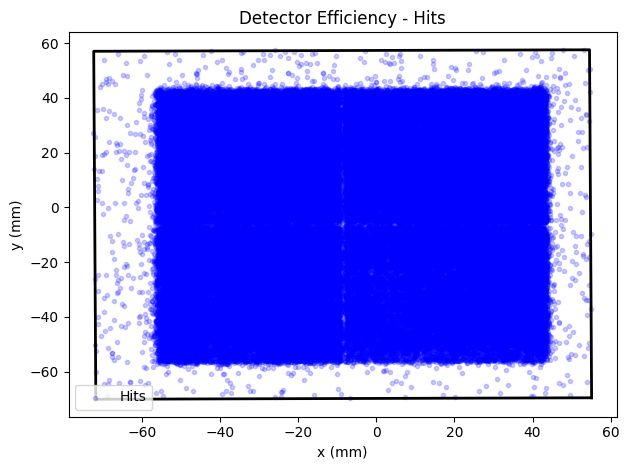

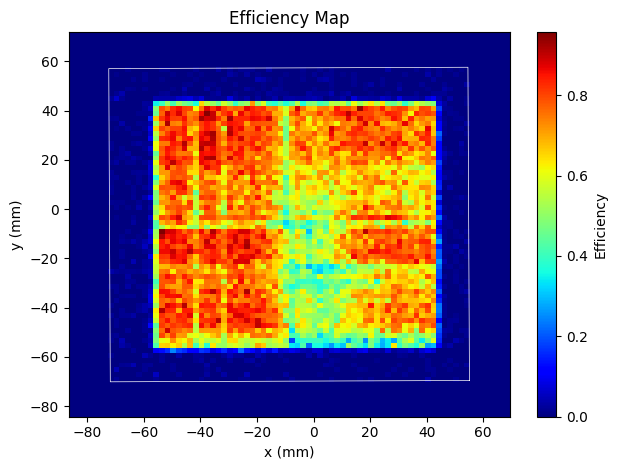

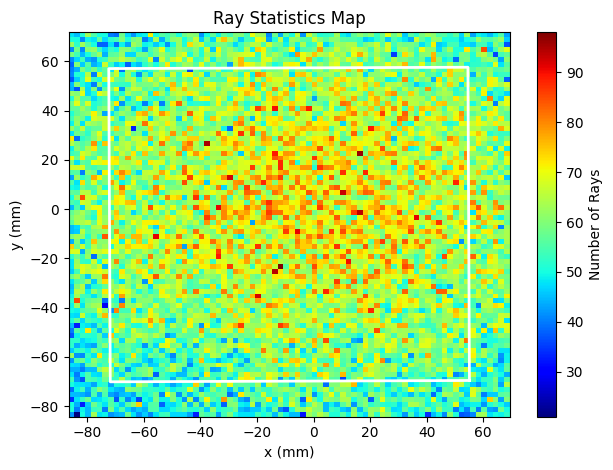

In [17]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2, grid_size=2)

/home/dylan/PycharmProjects/saclay_micromegas/poc/det_classes_test.py:1207: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


X Residuals: Mean=-5μm, Std=410μm
Y Residuals: Mean=-15μm, Std=465μm
X Residuals: Mean=-7μm, Std=454μm
Y Residuals: Mean=24μm, Std=461μm
X Residuals: Mean=1μm, Std=426μm
Y Residuals: Mean=-23μm, Std=496μm
X Residuals: Mean=6μm, Std=468μm
Y Residuals: Mean=8μm, Std=505μm


(-0.0016962115017593114,
 4.131731777575263e-05,
 0.38016652823489655,
 0.44201025998748694)

/home/dylan/PycharmProjects/saclay_micromegas/venv/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/dylan/PycharmProjects/saclay_micromegas/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


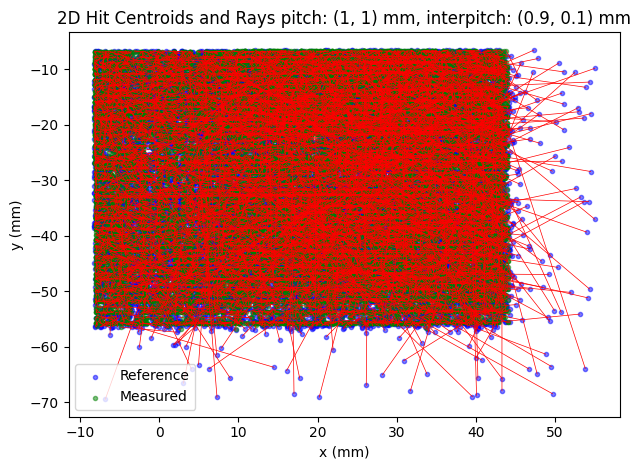

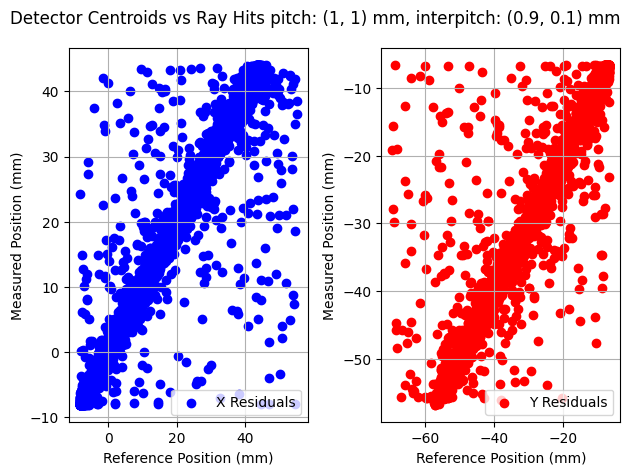

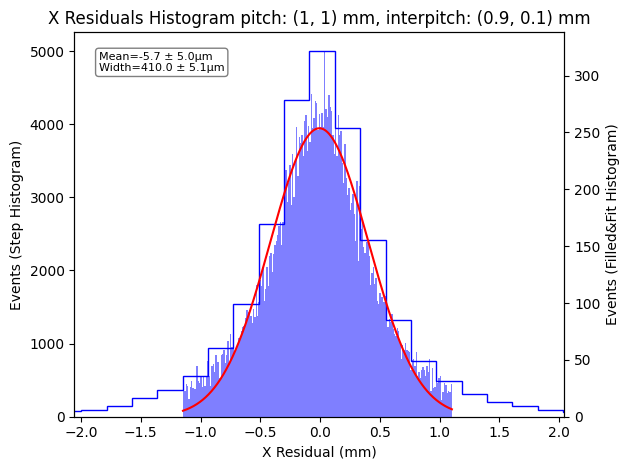

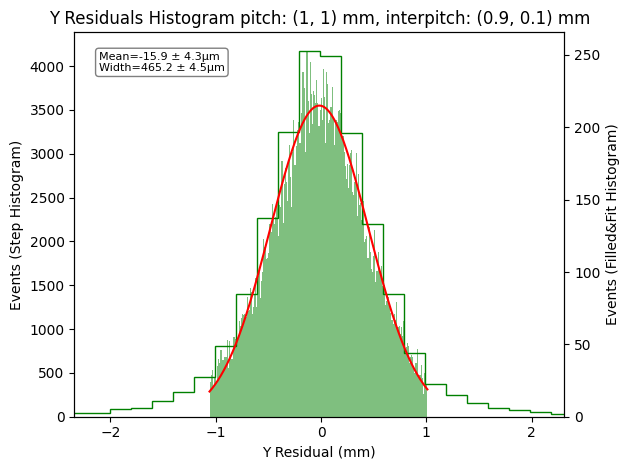

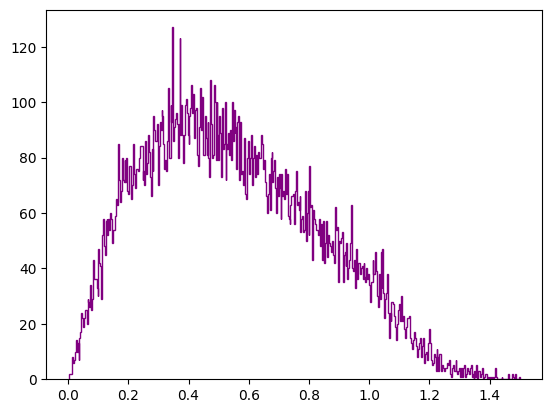

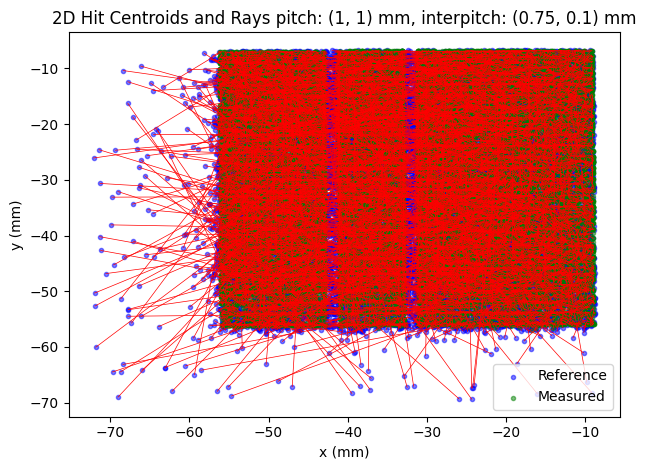

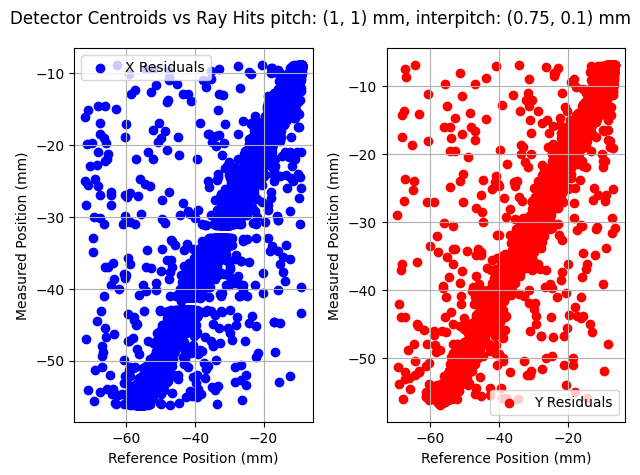

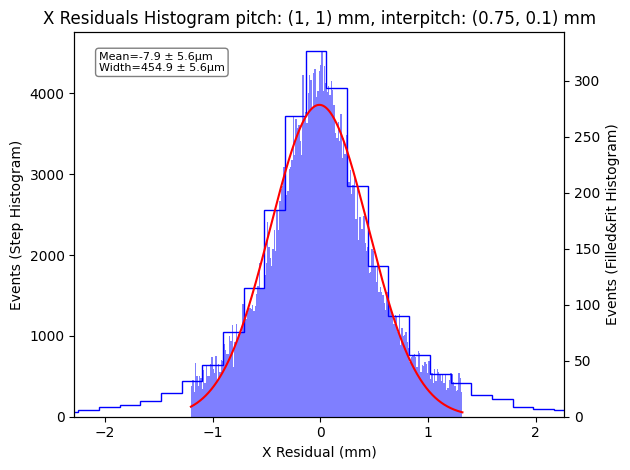

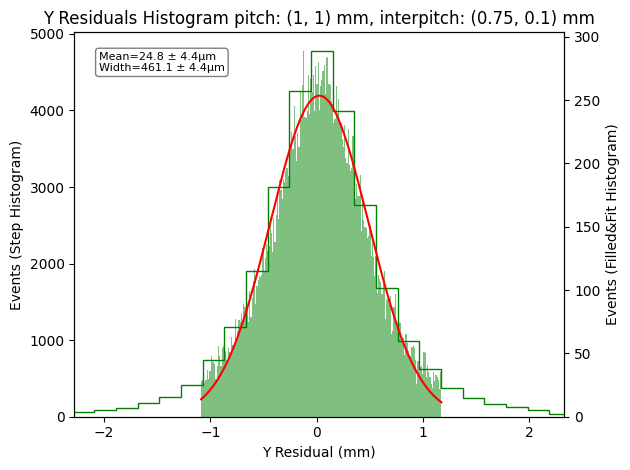

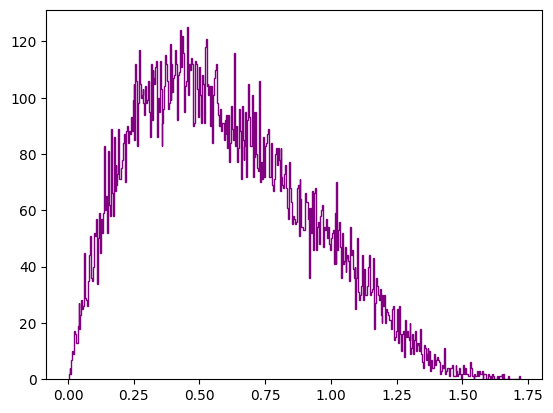

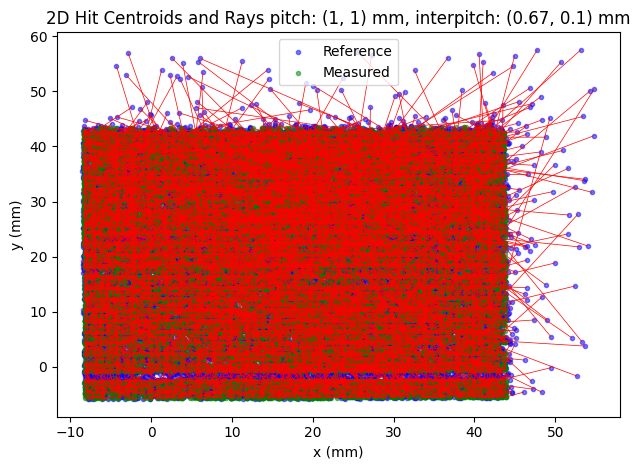

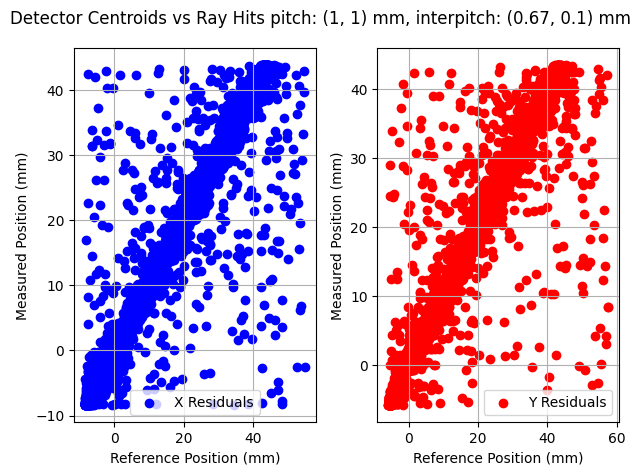

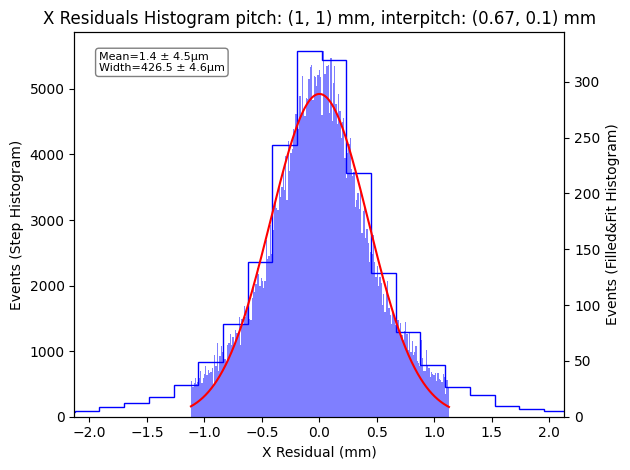

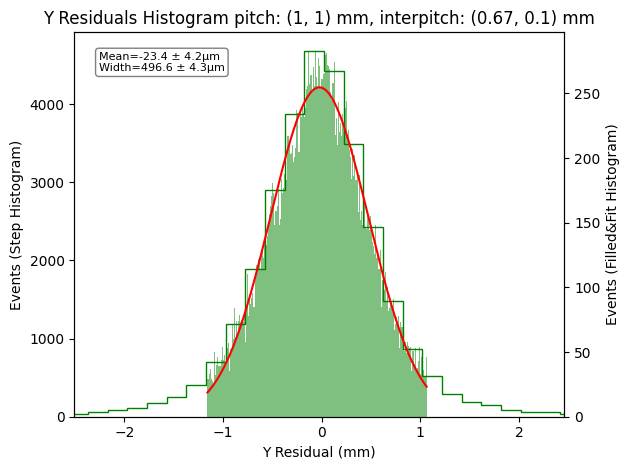

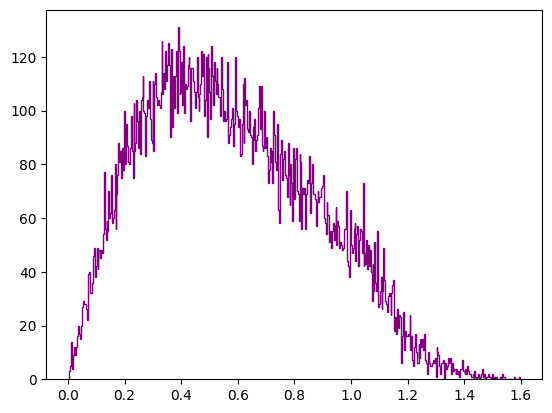

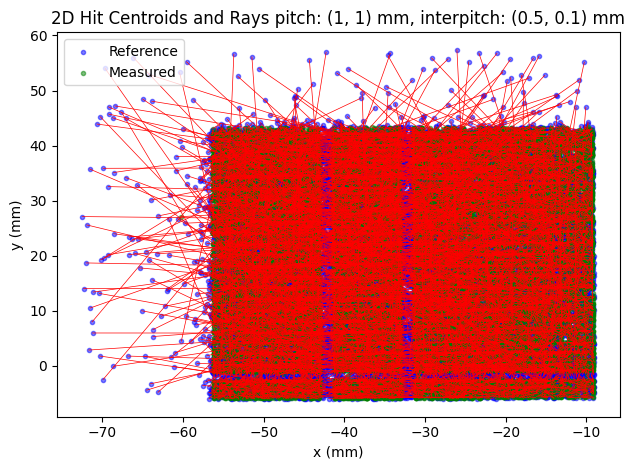

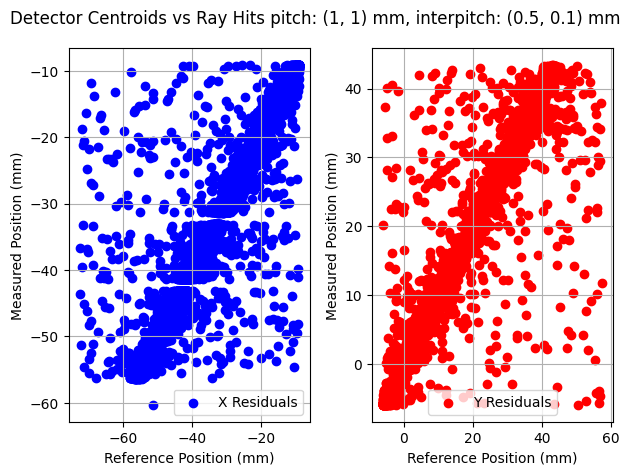

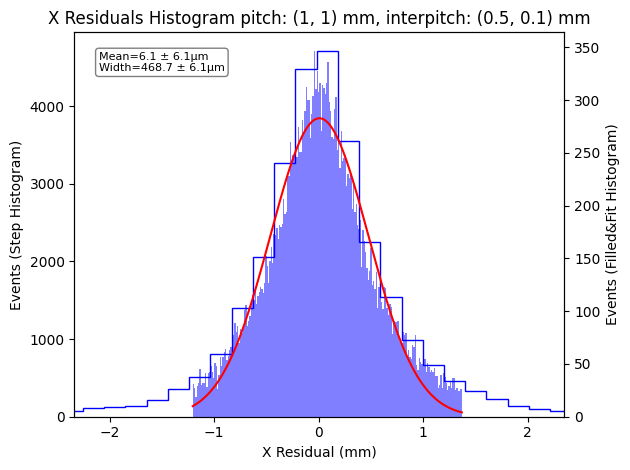

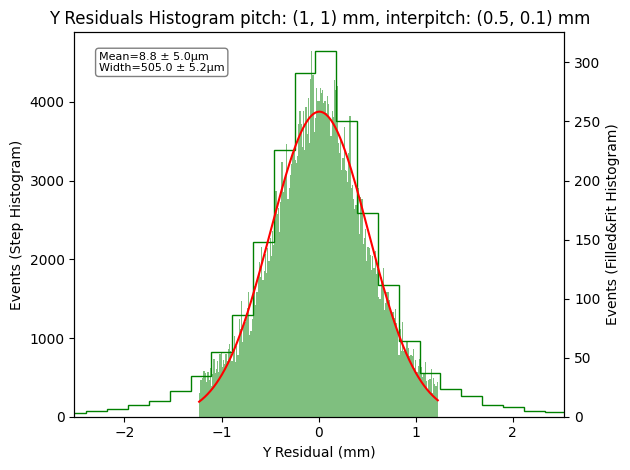

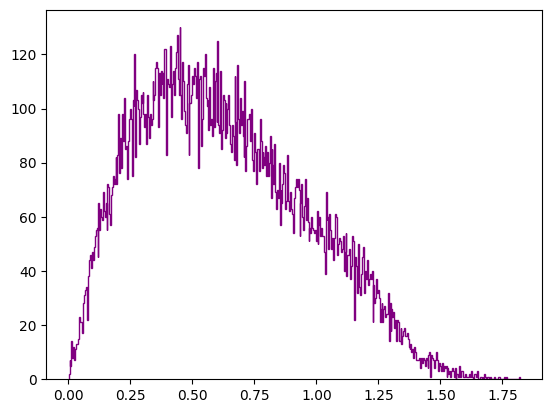

In [18]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [19]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2)

  pitch_x pitch_y interpitch_x interpitch_y    x_mean  x_mean_err    y_mean  \
0       1       1          0.9          0.1 -0.005740    0.005031  0.465246   
1       1       1         0.75          0.1 -0.007935    0.005551  0.461070   
2       1       1         0.67          0.1  0.001382    0.004525  0.496629   
3       1       1          0.5          0.1  0.006098    0.006065  0.505029   

   y_mean_err     x_std  x_std_err     y_std  y_std_err  
0    0.004482  0.410029   0.005061  0.465246   0.004482  
1    0.004450  0.454901   0.005586  0.461070   0.004450  
2    0.004328  0.426537   0.004568  0.496629   0.004328  
3    0.005152  0.468660   0.006108  0.505029   0.005152  


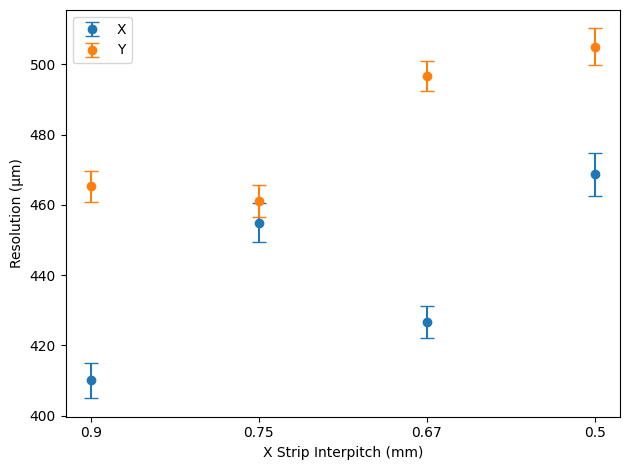

In [20]:
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

In [21]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

TypeError: get_residuals_subdets_with_err() got an unexpected keyword argument 'max_r'

New stuff above

In [22]:
import numpy as np
from scipy.optimize import curve_fit as cf

def gaus(x, a, x0, sigma):
    return a * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def fit_residuals_return_err(x_res, y_res, n_bins=200):
    # Get residuals between 5th and 95th percentile
    x_res = np.array(x_res)
    y_res = np.array(y_res)
    x_res = x_res[(x_res > np.percentile(x_res, 5)) & (x_res < np.percentile(x_res, 95))]
    y_res = y_res[(y_res > np.percentile(y_res, 5)) & (y_res < np.percentile(y_res, 95))]

    # Bin residuals with numpy
    x_counts, x_bin_edges = np.histogram(x_res, bins=n_bins)
    y_counts, y_bin_edges = np.histogram(y_res, bins=n_bins)

    # Fit gaussians to residuals
    x_bins = (x_bin_edges[1:] + x_bin_edges[:-1]) / 2
    y_bins = (y_bin_edges[1:] + y_bin_edges[:-1]) / 2

    fit_bounds = [(-np.inf, -np.inf, 0), (np.inf, np.inf, np.inf)]
    p0_x = [np.max(x_counts), np.mean(x_res), np.std(x_res)]
    p0_y = [np.max(y_counts), np.mean(y_res), np.std(y_res)]
    try:
        x_popt, x_pcov = cf(gaus, x_bins, x_counts, p0=p0_x, bounds=fit_bounds)
        y_popt, y_pcov = cf(gaus, y_bins, y_counts, p0=p0_y, bounds=fit_bounds)

        return x_popt, y_popt, np.sqrt(np.diag(x_pcov)), np.sqrt(np.diag(y_pcov))
    except (RuntimeError, ValueError):  # Except runtime or value error
        return [np.max(x_counts), np.mean(x_res), np.std(x_res)], [np.max(y_counts), np.mean(y_res), np.std(y_res)], None, None


def get_rays_in_sub_det(det, sub_det, x_rays, y_rays, event_num_rays, tolerance=0.0):
    """
    Get rays that are within the sub-detector.
    :param det:
    :param sub_det:
    :param x_rays:
    :param y_rays:
    :param event_num_rays:
    :param tolerance: Tolerance in mm for ray to be in sub-detector.
    :return:
    """
    x_rays_sub, y_rays_sub, event_num_rays_sub = [], [], []
    for x_ray, y_ray, event_num_ray in zip(x_rays, y_rays, event_num_rays):
        if det.in_sub_det(sub_det.sub_index, x_ray, y_ray, det.center[2], tolerance):
            x_rays_sub.append(x_ray)
            y_rays_sub.append(y_ray)
            event_num_rays_sub.append(event_num_ray)
    return x_rays_sub, y_rays_sub, event_num_rays_sub


def get_residuals_subdets_with_err(det, ray_data, in_det=False, tolerance=0.0, max_r=None):
    resid_df = []
    subs_centroids, subs_triggers = det.get_sub_centroids_coords()
    for sub_centroids, sub_triggers, sub_det in zip(subs_centroids, subs_triggers, det.sub_detectors):
        x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2], list(sub_triggers))
        if in_det:
            x_rays, y_rays, event_num_rays = get_rays_in_sub_det(det, sub_det, x_rays, y_rays, event_num_rays, tolerance)

        if event_num_rays is None or len(event_num_rays) == 0:
            continue

        # Sort sub_triggers and sub_centroids together by sub_trigger
        sub_triggers, sub_centroids = zip(*sorted(zip(sub_triggers, sub_centroids)))
        sub_centroids, sub_triggers = np.array(sub_centroids), np.array(sub_triggers)

        # Sort x_rays, y_rays, and event_num_rays by event_num_rays
        event_num_rays, x_rays, y_rays = zip(*sorted(zip(event_num_rays, x_rays, y_rays)))
        event_num_rays, x_rays, y_rays = np.array(event_num_rays), np.array(x_rays), np.array(y_rays)

        # Find indices of sub_triggers in event_num_rays
        matched_indices = np.in1d(np.array(sub_triggers), np.array(event_num_rays)).nonzero()[0]

        if len(matched_indices) == 0:
            continue

        centroids_i_matched = sub_centroids[matched_indices]

        x_res_i = centroids_i_matched[:, 0] - x_rays
        y_res_i = centroids_i_matched[:, 1] - y_rays

        if max_r is not None:
            r_i = np.sqrt(x_res_i**2 + y_res_i**2)
            valid_indices = r_i < max_r
            x_res_i = x_res_i[valid_indices]
            y_res_i = y_res_i[valid_indices]

        x_popt_i, y_popt_i, x_perr_i, y_perr_i = fit_residuals_return_err(x_res_i, y_res_i)
        resid_df.append({'pitch_x': sub_det.x_pitch, 'pitch_y': sub_det.y_pitch,
                         'interpitch_x': sub_det.x_interpitch, 'interpitch_y': sub_det.y_interpitch,
                         'x_mean': x_popt_i[1], 'x_mean_err': x_perr_i[1],
                         'y_mean': y_popt_i[2], 'y_mean_err': y_perr_i[2],
                         'x_std': x_popt_i[2], 'x_std_err': x_perr_i[2],
                         'y_std': y_popt_i[2], 'y_std_err': y_perr_i[2]})

    return resid_df  # Not a dataframe, but a list of dictionaries to avoid pandas dependency!

  pitch_x pitch_y interpitch_x interpitch_y    x_mean  x_mean_err    y_mean  \
0       1       1          0.9          0.1 -0.005202    0.004338  0.455352   
1       1       1         0.75          0.1 -0.008320    0.004850  0.441416   
2       1       1         0.67          0.1  0.001454    0.004253  0.484143   
3       1       1          0.5          0.1  0.004466    0.005289  0.485612   

   y_mean_err     x_std  x_std_err     y_std  y_std_err  
0    0.005039  0.396822   0.004477  0.455352   0.005039  
1    0.004289  0.435709   0.005038  0.441416   0.004289  
2    0.004733  0.411406   0.004440  0.484143   0.004733  
3    0.005053  0.445786   0.005532  0.485612   0.005053  


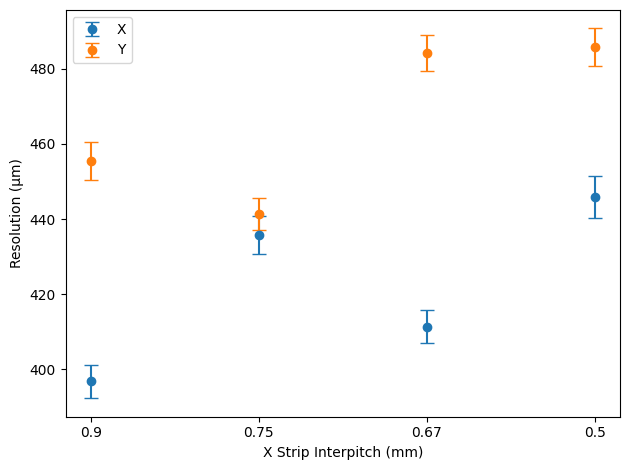

In [23]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()